In [ ]:
!unzip /content/train_features.csv.zip

In [ ]:
# Import All Required Libraries

# Data Loading and processing
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models and Evaluation Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Load the dataset to pandas dataframe
df = pd.read_csv("/content/train_features.csv")

In [ ]:
# View top 5 rows from dataset
df.head(5)

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


In [ ]:
# View last 5 rows from dataset
df.tail(5)

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
1749489,1316,2016-12-31 23:00:00,38.844,0,14,Entertainment/public assembly,49975,255,0,-29.9,...,4.116,4.009,4.012,4.056,3.910,3.532,4.710,4.179,3.802,3.865
1749490,1318,2016-12-31 23:00:00,202.893,0,14,Entertainment/public assembly,73488,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.959,3.532,4.710,4.963,4.977,5.318
1749491,1319,2016-12-31 23:00:00,NaN,0,14,Entertainment/public assembly,287419,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.875,3.532,4.710,4.883,4.928,4.906
1749492,1323,2016-12-31 23:00:00,172.000,0,14,Office,87200,255,0,-29.9,...,4.116,4.009,4.012,4.056,5.210,4.211,4.710,5.283,5.160,5.157
1749493,1353,2016-12-31 23:00:00,2.400,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.009,4.012,4.056,1.967,1.556,4.188,1.750,1.896,1.566


In [ ]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 57 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   building_id                    int64  
 1   timestamp                      object 
 2   meter_reading                  float64
 3   anomaly                        int64  
 4   site_id                        int64  
 5   primary_use                    object 
 6   square_feet                    int64  
 7   year_built                     int64  
 8   floor_count                    int64  
 9   air_temperature                float64
 10  cloud_coverage                 int64  
 11  dew_temperature                float64
 12  precip_depth_1_hr              int64  
 13  sea_level_pressure             float64
 14  wind_direction                 int64  
 15  wind_speed                     float64
 16  air_temperature_mean_lag7      float64
 17  air_temperature_max_lag7       float64
 18  ai

In [ ]:
# CHeck for NULL values
df.isnull().sum()

,0
building_id,0
timestamp,0
meter_reading,107653
anomaly,0
site_id,0
primary_use,0
square_feet,0
year_built,0
floor_count,0
air_temperature,0


In [ ]:
# Data Descriptions
df.describe()

,building_id,meter_reading,anomaly,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
count,1.749494e+06,1.641841e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,...,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06
mean,7.908894e+02,1.799018e+02,2.131816e-02,7.819728e+00,1.065658e+05,1.925582e+02,1.002549e+00,1.650747e+01,1.169304e+02,8.809186e+00,...,4.116000e+00,4.116496e+00,4.116366e+00,4.115904e+00,4.315819e+00,4.205350e+00,4.261428e+00,4.315266e+00,4.315661e+00,4.314160e+00
std,4.118085e+02,3.959129e+02,1.444428e-01,4.830006e+00,1.025531e+05,8.934352e+01,2.237710e+00,1.032373e+01,1.263866e+02,9.871421e+00,...,1.297691e-10,1.172369e-01,7.456097e-02,4.426736e-02,1.360274e+00,3.888381e-01,6.918509e-01,1.380285e+00,1.365402e+00,1.367109e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.980000e+02,0.000000e+00,0.000000e+00,-2.990000e+01,0.000000e+00,-3.600000e+01,...,4.116000e+00,3.942000e+00,3.989000e+00,4.056000e+00,4.370000e-01,1.556000e+00,2.670000e+00,4.070000e-01,4.030000e-01,4.300000e-02
25%,3.450000e+02,3.000000e+01,0.000000e+00,3.000000e+00,3.182900e+04,8.200000e+01,0.000000e+00,9.100000e+00,0.000000e+00,2.000000e+00,...,4.116000e+00,4.009000e+00,4.012000e+00,4.078000e+00,3.537000e+00,4.211000e+00,4.090000e+00,3.522000e+00,3.539000e+00,3.536000e+00
50%,8.960000e+02,8.410000e+01,0.000000e+00,9.000000e+00,7.108800e+04,2.550000e+02,0.000000e+00,1.670000e+01,4.000000e+00,9.700000e+00,...,4.116000e+00,4.138000e+00,4.147000e+00,4.102000e+00,4.442000e+00,4.211000e+00,4.548000e+00,4.395000e+00,4.406000e+00,4.410000e+00
75%,1.147000e+03,1.990000e+02,0.000000e+00,1.300000e+01,1.383160e+05,2.550000e+02,0.000000e+00,2.440000e+01,2.550000e+02,1.670000e+01,...,4.116000e+00,4.244000e+00,4.173000e+00,4.162000e+00,5.238000e+00,4.489000e+00,4.662000e+00,5.270000e+00,5.238000e+00,5.262000e+00
max,1.353000e+03,6.596890e+03,1.000000e+00,1.500000e+01,4.843760e+05,2.550000e+02,1.200000e+01,4.720000e+01,2.550000e+02,2.610000e+01,...,4.116000e+00,4.265000e+00,4.176000e+00,4.186000e+00,8.424000e+00,4.891000e+00,7.270000e+00,8.576000e+00,8.493000e+00,8.458000e+00


EDA Visualizations

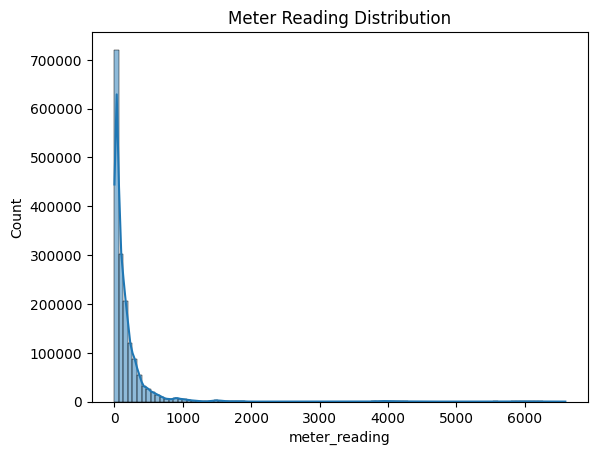

In [ ]:
# Histogram of meter reading
sns.histplot(df['meter_reading'].dropna(), bins=100, kde=True)
plt.title("Meter Reading Distribution")
plt.show()

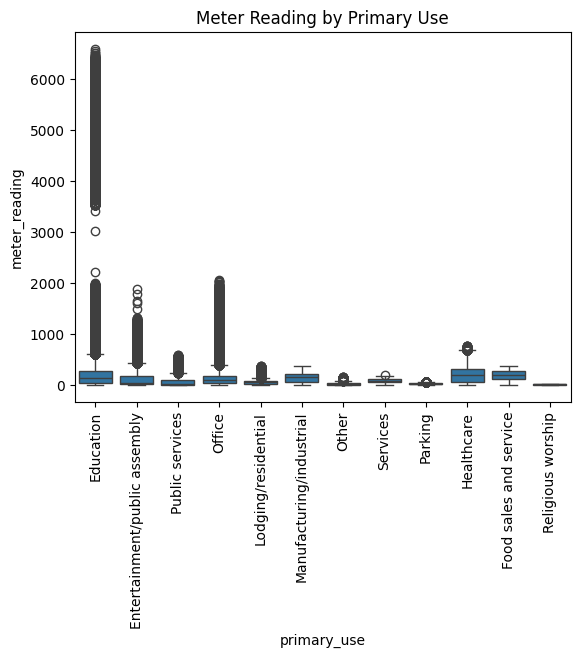

In [ ]:
# Boxplot of meter reading by primary use
sns.boxplot(x='primary_use', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.xticks(rotation=90)
plt.title("Meter Reading by Primary Use")
plt.show()

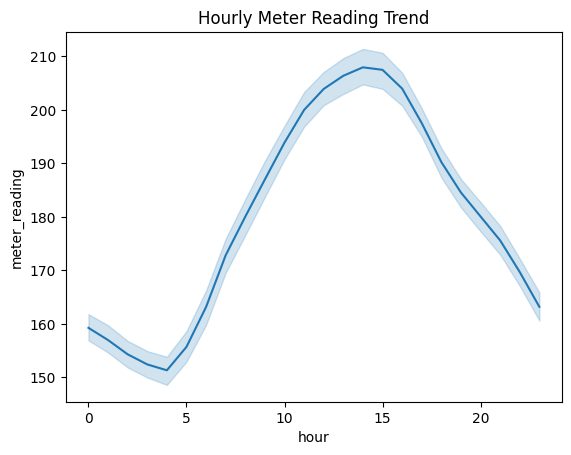

In [ ]:
# Lineplot showing average meter reading by hour
sns.lineplot(x='hour', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.title("Hourly Meter Reading Trend")
plt.show()

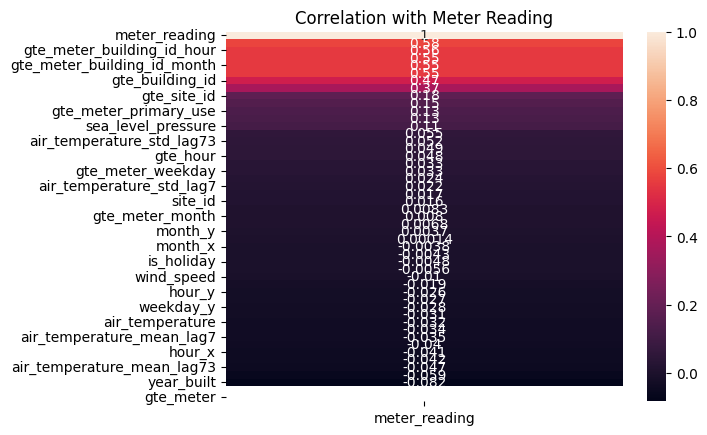

In [ ]:
#  Heatmap of correlation with meter reading
sns.heatmap(df.corr(numeric_only=True)[['meter_reading']].sort_values('meter_reading', ascending=False), annot=True)
plt.title("Correlation with Meter Reading")
plt.show()

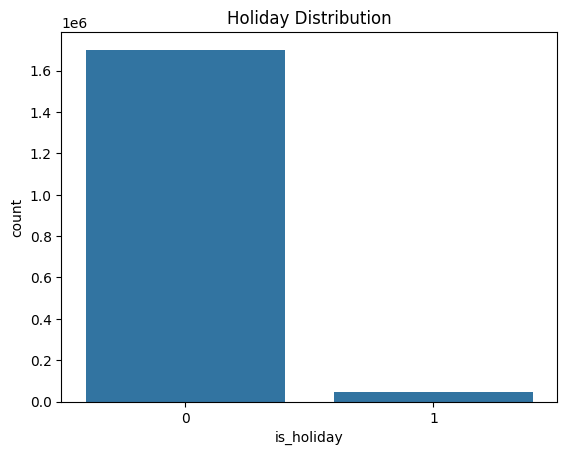

In [ ]:
# Countplot for holiday distribution
sns.countplot(x='is_holiday', data=df)
plt.title("Holiday Distribution")
plt.show()

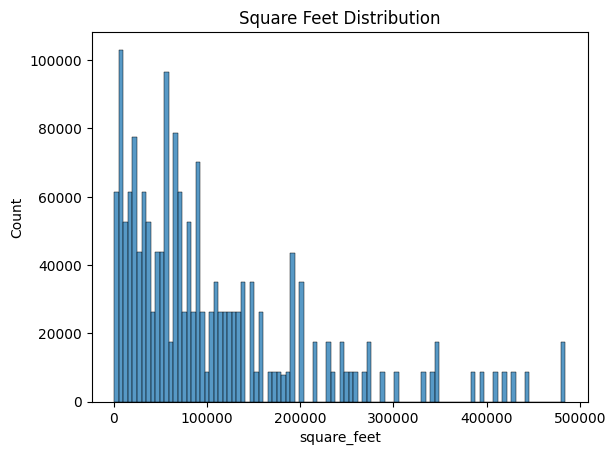

In [ ]:
# Histogram of square feet
sns.histplot(df['square_feet'], bins=100)
plt.title("Square Feet Distribution")
plt.show()

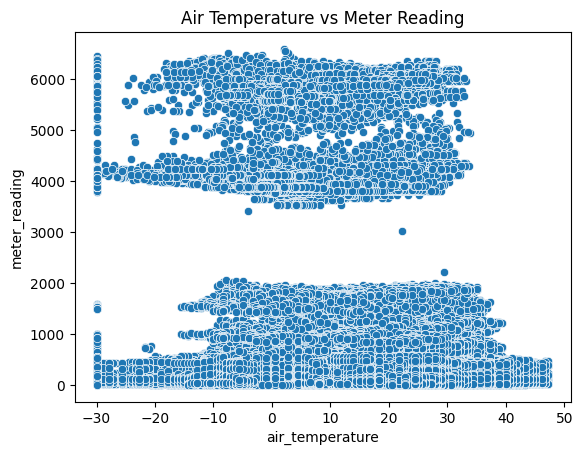

In [ ]:
# Scatterplot: air temperature vs meter reading
sns.scatterplot(x='air_temperature', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.title("Air Temperature vs Meter Reading")
plt.show()

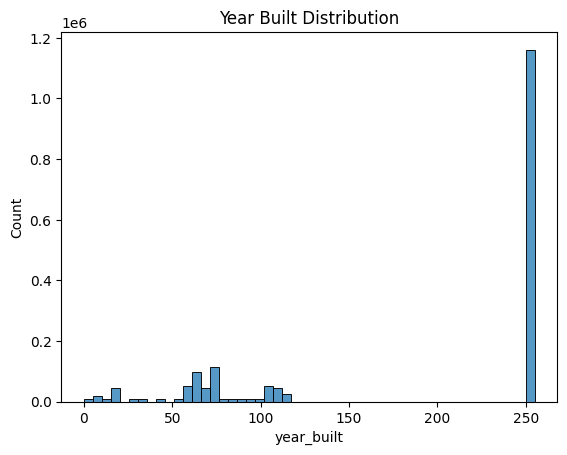

In [ ]:
# Histogram of year built
sns.histplot(df['year_built'], bins=50)
plt.title("Year Built Distribution")
plt.show()

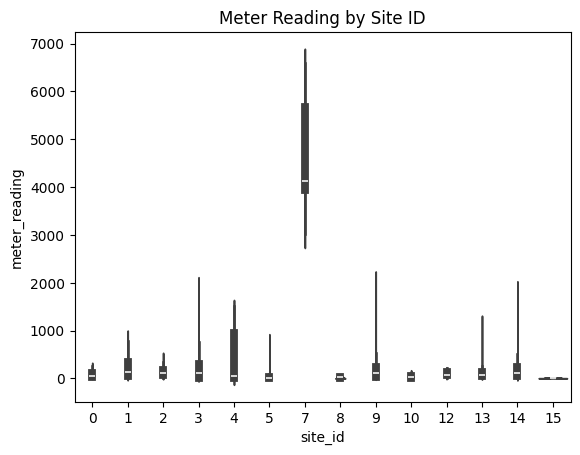

In [ ]:
# Violin plot: site ID vs meter reading
sns.violinplot(x='site_id', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.title("Meter Reading by Site ID")
plt.show()